In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

In [2]:
def Poisson_process(lam,T):
    t = 0
    S =[0]
    check = True
    while check:
        U = np.random.random()
        t = t - 1/lam*np.log(U)
        if t > T:
            check = False
        S.append(t)
    return S



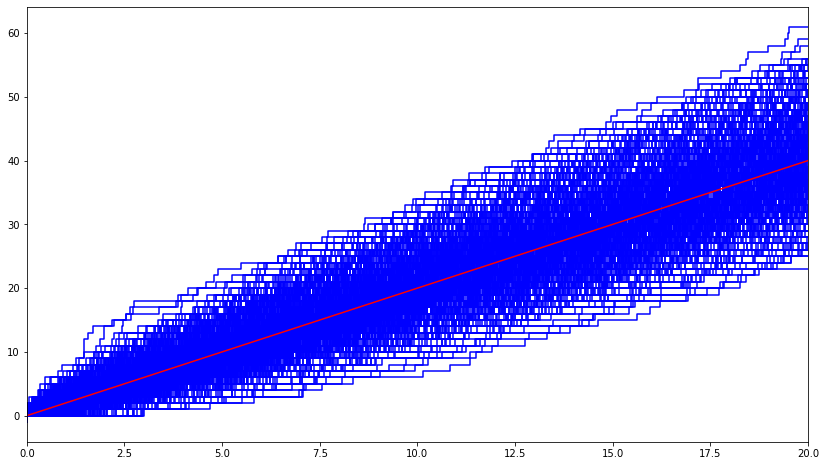

In [3]:
lam = 2
plt.figure(figsize=(14,8))
plt.xlim(0,20)
for i in range(1000):
    x = Poisson_process(lam,20)
    n = len(x)
    y = np.arange(n)
    plt.step(x,y-1,color = 'blue')
plt.plot(np.linspace(0,20,1000),lam*np.linspace(0,20,1000), color = 'red')

In [4]:
def Poisson_process_2(lam,T):
    step = 1/50
    x = np.arange(0,T,step)
    N = [0]
    for i in x:
        U = np.random.random()
        if U <= lam*T/len(x):
            N.append(i)
    return N

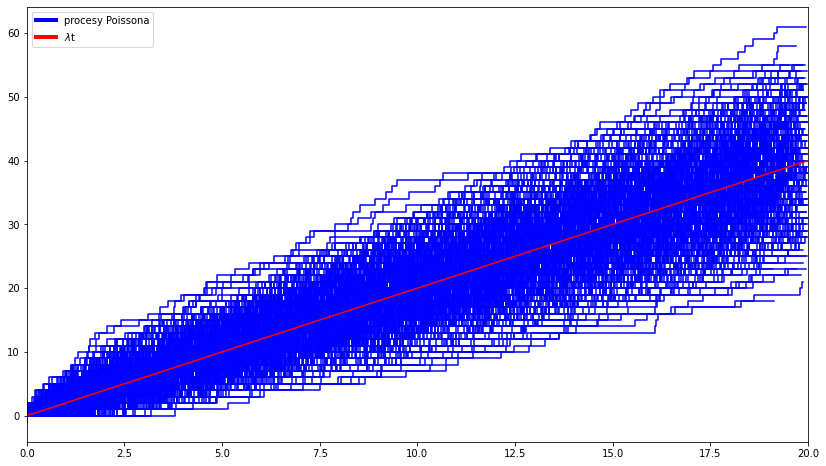

In [5]:
lam = 2
plt.figure(figsize=(14,8))
plt.xlim(0,20)
for i in range(1000):
    x = Poisson_process_2(lam,20)
    n = len(x)
    y = np.arange(n)
    plt.step(x,y-1,color = 'blue')
plt.plot(np.linspace(0,20,1000),lam*np.linspace(0,20,1000), color = 'red')
plt.legend(handles = [plt.Line2D([0], [0], color='b', lw=4, label='procesy Poissona'),plt.Line2D([0], [0], color='r', lw=4, label="$\lambda$t")])

In [6]:
#sprawdzanie
t = 20
P = np.array([])
for i in range(100000):
    P_app = len(np.array(Poisson_process(lam,t)))
    P = np.append(P,P_app)



In [7]:

M = np.array([np.count_nonzero(P == x) for x in range(70)])/len(P)

In [8]:
max(P)

75.0

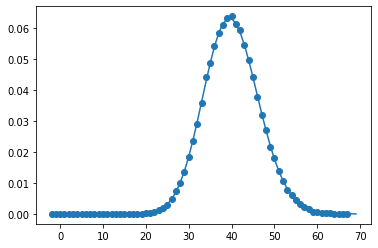

In [9]:
plt.scatter(np.arange(70)-2,M) #to nie jest dobrze
plt.plot(np.arange(70),poisson.pmf(np.arange(70),mu= lam*t))

In [10]:
#zadanie 3

In [90]:
def Poisson_process_3(T,lam):
    n = np.random.poisson(lam*T)
    if n == 0:
        return 0
    U = np.random.uniform(0,T,n)
    return np.sort(U)

    
Poisson_process_3(20,2)

array([ 0.08100165,  1.20801606,  1.35653155,  2.05564112,  2.38936657,
        3.90236953,  4.76071835,  5.05197897,  5.33280707,  5.61899773,
        6.03404097,  6.25956758,  6.28005908,  7.2149105 ,  7.49892109,
        7.69068852,  7.89618966,  8.15134787,  8.36323887,  9.94685765,
       10.32902192, 10.65800477, 10.80271091, 10.84407324, 11.73025178,
       12.21083282, 12.28207851, 12.42878801, 12.83680055, 13.2350185 ,
       13.53049883, 13.59960664, 13.85603326, 14.38960214, 15.08642133,
       15.5742915 , 15.97956272, 16.38956289, 16.8643933 , 18.8181724 ,
       19.54592797, 19.61965101, 19.9244382 , 19.98999553])

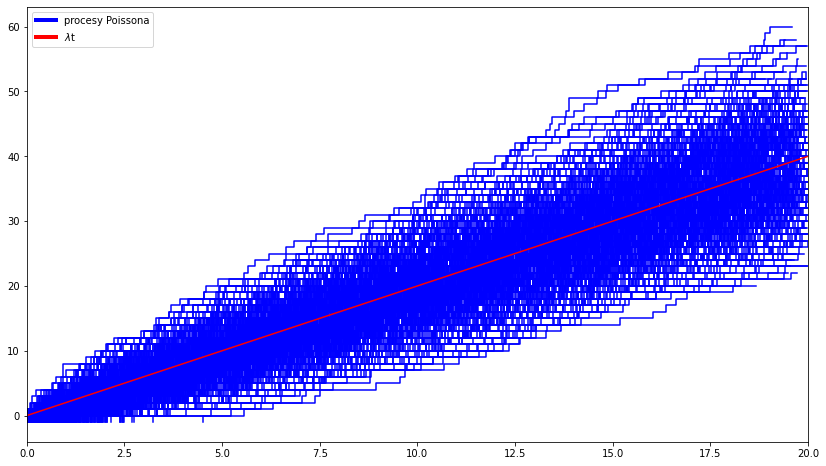

In [91]:
lam = 2
plt.figure(figsize=(14,8))
plt.xlim(0,20)
for i in range(1000):
    x = Poisson_process_3(20,lam)
    n = len(x)
    y = np.arange(n)
    plt.step(x,y-1,color = 'blue')
plt.plot(np.linspace(0,20,100),lam*np.linspace(0,20,100), color = 'red')
plt.legend(handles = [plt.Line2D([0], [0], color='b', lw=4, label='procesy Poissona'),plt.Line2D([0], [0], color='r', lw=4, label="$\lambda$t")])

In [92]:
#sprawdzić jeszcze wartość oczekiwaną?

In [93]:
#wyestymować lambdę - wektor lambd, random choice i potem dedukujesz
def Poisson_guess_lambda(T):
    lambda_pool = [1,2,3,4,5]
    lam = np.random.choice(lambda_pool)
    print(lam)
    return Poisson_process_3(T,lam)

In [106]:
P = Poisson_guess_lambda(20)
P = np.insert(P,0,0)
P

3


array([ 0.        ,  0.40542519,  0.490999  ,  0.53377871,  0.6538431 ,
        1.23749272,  1.42547777,  1.55426755,  2.32866257,  3.31112491,
        3.4598642 ,  3.74048134,  3.76294871,  3.92346177,  4.04093306,
        4.54669083,  4.9440175 ,  4.98500342,  5.31844788,  5.51427535,
        5.58534319,  5.75652316,  5.77637337,  5.77645354,  5.81985481,
        6.18937617,  6.49957932,  6.67791868,  7.43122881,  8.60739822,
        8.66900007,  8.93790499,  8.93812849,  9.58468805,  9.65928875,
        9.87208009, 10.04058106, 10.21593278, 10.28514638, 11.13800524,
       11.37590951, 11.64535982, 12.21972765, 12.26043962, 12.31210107,
       12.36928762, 12.61675093, 13.39622796, 14.07753197, 14.23120752,
       15.28859242, 15.31951697, 15.43139405, 15.65082179, 15.78121057,
       15.81459037, 15.86574171, 16.44113092, 16.63361265, 17.34776533,
       17.54567285, 17.67141297, 17.75940888, 18.45697677, 19.37628197])

In [107]:
P_step_time = []
for i in range(len(P)):
    P_step_time.append(P[i+1]-P[i])

IndexError: index 65 is out of bounds for axis 0 with size 65

In [108]:
P_step_time

[0.40542518534503413,
 0.08557381496486771,
 0.042779714221492515,
 0.12006438779690765,
 0.583649619866875,
 0.18798504894256274,
 0.128789776568643,
 0.7743950265901778,
 0.9824623369168783,
 0.14873929216668413,
 0.2806171370916588,
 0.0224673674361342,
 0.16051306322942605,
 0.11747128954693054,
 0.5057577673560614,
 0.3973266749468225,
 0.04098591297286447,
 0.3334444664877356,
 0.19582746320507383,
 0.0710678480794229,
 0.1711799628906192,
 0.01985021332482617,
 8.017347325051105e-05,
 0.04340126566729374,
 0.3695213595675,
 0.31020315489430317,
 0.17833935486901709,
 0.7533101311659962,
 1.1761694059872045,
 0.061601857559569595,
 0.2689049120685212,
 0.00022350946908389346,
 0.6465595550168928,
 0.07460069940518288,
 0.2127913424948389,
 0.16850096396577463,
 0.1753517245144689,
 0.06921360066824533,
 0.8528588606823622,
 0.23790427053497254,
 0.2694503127431567,
 0.5743678288373602,
 0.040711964837129244,
 0.0516614542368643,
 0.0571865489565937,
 0.24746331034264557,
 0.77947

In [109]:
1/np.mean(P_step_time) #nie do końca działa, nie wiem czemu 

3.3030072596718023

In [130]:
r = 1
    

In [131]:
n=1000
theta = np.random.uniform(0,2*np.pi,n)
def get_r(n):
    U = np.random.random(n)
    return np.sqrt(U)

r = get_r(n)

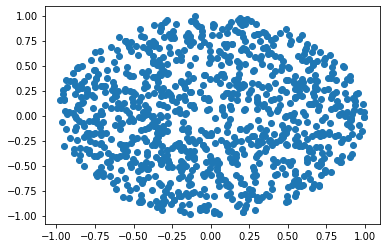

In [132]:
plt.scatter(r*np.cos(theta),r*np.sin(theta))
#intensywność to by była lambda * wielkość obszaru

In [133]:
def Poisson_na_kole_o(lam):
    n = np.random.poisson(lam*np.pi)
    if n == 0:
        return 0
    czas_oczekiwania = np.random.uniform(0,np.pi,n) #??????
    czas_oczekiwania = np.sort(czas_oczekiwania)

##pododawać
    

In [134]:
#niejednorodne:
#l(t) = 2/(1+t)

In [144]:
def Poisson_niejednorodny(T,lam):
    t = 0
    S = [0]
    while True:    
        U1 = np.random.random()
        t = t - 1/lam*np.log(U1)
        if t > T:
            break
        U2 = np.random.random()
        if U2 <= 2/(lam*(1+t)):
            S.append(t)
    return S



In [147]:
def Poisson_niejednorodny_2(lam,T):
    t = 0
    S =[0]
    check = True
    while check:
        U = np.random.random()
        t = t - 1/lam*np.log(U)
        if t > T:
            check = False
        if np.random.random() <= 1/(lam*(1+t)):
            S.append(t)
    return S



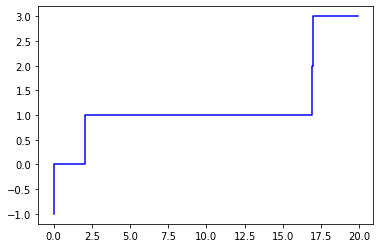

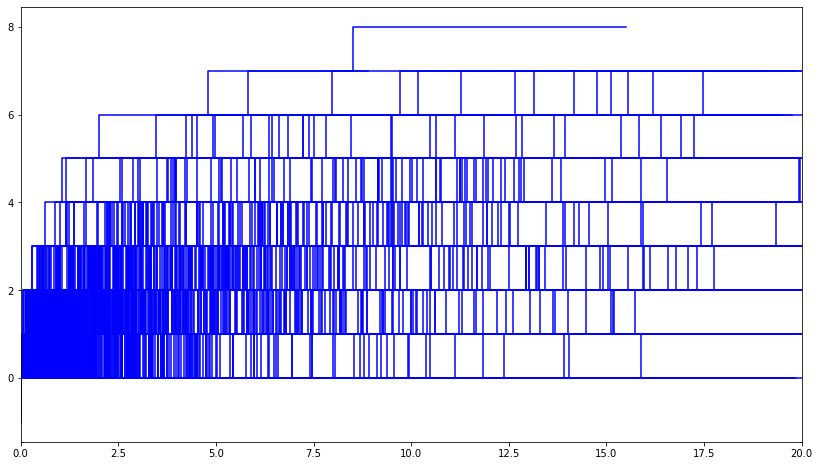

In [151]:
lam = 2
plt.figure(figsize=(14,8))
plt.xlim(0,20)
for i in range(1000):
    x = Poisson_niejednorodny_2(lam,20)
    n = len(x)
    y = np.arange(n)
    plt.step(x,y-1,color = 'blue')